# **Northwind Suppliers Analysis**

## **Data Collection**

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium as fm
plt.style.use('ggplot')

In [2]:
products_cols = ["ProductID","ProductName","SupplierID","CategoryID","UndiscountedUnitPrice",]
suppliers_cols = ["SupplierID","SupplierName","ContactName","ContactTitle","City","Region","Country"]
orders_cols = ["OrderID","OrderDate","RequiredDate","ShippedDate","ShipVia","Freight","ShipName","ShipCity","ShipRegion","ShipPostalCode","ShipCountry"]
categories_cols = ["CategoryID","CategoryName"]

products = pd.read_csv("../data/products.csv", usecols=products_cols, encoding='latin1')
categories = pd.read_csv("../data/categories.csv", usecols=categories_cols, encoding='latin1')
suppliers = pd.read_csv("../data/suppliers.csv", usecols=suppliers_cols, encoding='latin1')
orders = pd.read_csv("../data/orders.csv", usecols= orders_cols, encoding='latin1')
order_details = pd.read_csv("../data/order_details.csv",encoding='latin1')
shippers = pd.read_csv("../data/shippers.csv",encoding='latin1')


In [ ]:
# products.to_csv("products.csv", index=False)
# suppliers.to_csv("suppliers.csv", index=False)
# orders.to_csv("orders.csv", index=False)
# order_details.to_csv("order_details.csv", index=False)
# shippers.to_csv("shippers.csv", index=False)
# categories.to_csv("categories.csv", index=False)

In [4]:
table_dict = {"products": products, "categories":categories,"suppliers": suppliers, "orders": orders, "order_details": order_details, "shippers": shippers}


for table_name, table in table_dict.items():
    print(f"{table_name} table has {table.shape[0]} rows and {table.shape[1]} columns")
    print(table.info())
    print("\n")

products table has 77 rows and 5 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ProductID              77 non-null     int64 
 1   ProductName            77 non-null     object
 2   SupplierID             77 non-null     int64 
 3   CategoryID             77 non-null     int64 
 4   UndiscountedUnitPrice  77 non-null     object
dtypes: int64(3), object(2)
memory usage: 3.1+ KB
None


categories table has 8 rows and 2 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CategoryID    8 non-null      int64 
 1   CategoryName  8 non-null      object
dtypes: int64(1), object(1)
memory usage: 260.0+ bytes
None


suppliers table has 29 rows and 7 columns
<class 'pandas.core.frame.Dat

In [5]:
display(products.head(3), categories.head(3),suppliers.head(3), orders.head(3), order_details.head(3), shippers.head(3))

,ProductID,ProductName,SupplierID,CategoryID,UndiscountedUnitPrice
0,1,Chai,1,1,$18.00
1,2,Chang,1,1,$19.00
2,3,Aniseed Syrup,1,2,$10.00


,CategoryID,CategoryName
0,1,Beverages
1,2,Condiments
2,3,Confections


,SupplierID,SupplierName,ContactName,ContactTitle,City,Region,Country
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,NaN,UK
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,New Orleans,LA,USA
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,Ann Arbor,MI,USA


,OrderID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10389,1995-01-20,1995-02-17,1995-01-24,2,47.42,Bottom-Dollar Markets,Tsawassen,BC,T2F 8M4,Canada
1,10390,1995-01-23,1995-02-20,1995-01-26,1,126.38,Ernst Handel,Graz,NaN,8010,Austria
2,10391,1995-01-23,1995-02-20,1995-01-31,3,5.45,Drachenblut Delikatessen,Aachen,NaN,52066,Germany


,OrderID,ProductID,DiscountedUnitPrice,Quantity
0,10248,11,14.0,12
1,10248,42,9.8,10
2,10248,72,34.8,5


,ShipperID,ShipperName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


## **Data Preparation**

In [6]:
products["UndiscountedUnitPrice"] = products["UndiscountedUnitPrice"].str.replace("$","").astype("float64")

orders["OrderDate"] = pd.to_datetime(orders["OrderDate"])
orders["ShippedDate"] = pd.to_datetime(orders["ShippedDate"])
orders["RequiredDate"] = pd.to_datetime(orders["RequiredDate"])
orders['ShippingTime'] = (orders['ShippedDate'] - orders['OrderDate']).dt.days

orders.rename(columns={"ShipVia":"ShipperID"}, inplace=True)

In [7]:
suppliers_analysis = (
    products.merge(categories, on="CategoryID")
    .merge(suppliers, on="SupplierID")
    .merge(order_details, on="ProductID")
    .merge(orders, on="OrderID")
    .merge(shippers, on="ShipperID")
)

suppliers_analysis.head()

,ProductID,ProductName,SupplierID,CategoryID,UndiscountedUnitPrice,CategoryName,SupplierName,ContactName,ContactTitle,City,...,ShipperID,Freight,ShipName,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,ShippingTime,ShipperName,Phone
0,1,Chai,1,1,18.0,Beverages,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,...,2,76.83,QUICK-Stop,Cunewalde,NaN,01307,Germany,6.0,United Package,(503) 555-3199
1,1,Chai,1,1,18.0,Beverages,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,...,2,147.26,Rattlesnake Canyon Grocery,Albuquerque,NM,87110,USA,6.0,United Package,(503) 555-3199
2,1,Chai,1,1,18.0,Beverages,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,...,1,12.69,Lonesome Pine Restaurant,Portland,OR,97219,USA,10.0,Speedy Express,(503) 555-9831
3,1,Chai,1,1,18.0,Beverages,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,...,2,0.78,Die Wandernde Kuh,Stuttgart,NaN,70563,Germany,8.0,United Package,(503) 555-3199
4,1,Chai,1,1,18.0,Beverages,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,...,3,53.80,Pericles Comidas clÃ¡sicas,MÃ©xico D.F.,NaN,05033,Mexico,6.0,Federal Shipping,(503) 555-9931


In [8]:
suppliers_analysis["Revenue"] = suppliers_analysis["DiscountedUnitPrice"]*suppliers_analysis["Quantity"]

suppliers_analysis.head(3)

,ProductID,ProductName,SupplierID,CategoryID,UndiscountedUnitPrice,CategoryName,SupplierName,ContactName,ContactTitle,City,...,Freight,ShipName,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,ShippingTime,ShipperName,Phone,Revenue
0,1,Chai,1,1,18.0,Beverages,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,...,76.83,QUICK-Stop,Cunewalde,NaN,01307,Germany,6.0,United Package,(503) 555-3199,648.0
1,1,Chai,1,1,18.0,Beverages,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,...,147.26,Rattlesnake Canyon Grocery,Albuquerque,NM,87110,USA,6.0,United Package,(503) 555-3199,259.2
2,1,Chai,1,1,18.0,Beverages,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,...,12.69,Lonesome Pine Restaurant,Portland,OR,97219,USA,10.0,Speedy Express,(503) 555-9831,288.0


In [9]:
suppliers_analysis.to_csv("suppliers_analysis.csv", index=False)

## **Analysis**

In [23]:
# # Group by SupplierName and calculate total revenue
# supplier_revenue = suppliers_analysis.groupby('SupplierName')['Revenue'].sum().reset_index().sort_values(by="Revenue", ascending=True)

# # Plot supplier performance
# fig, ax = plt.subplots(figsize=(14, 8))
# bars = ax.barh(supplier_revenue['SupplierName'], supplier_revenue['Revenue'], color='skyblue')
# ax.set_title('Supplier Performance by Revenue')
# ax.set_xlabel('Total Revenue')
# ax.set_ylabel('Supplier')
# ax.set_yticks(range(len(supplier_revenue['SupplierName'])))
# ax.set_yticklabels(supplier_revenue['SupplierName'])

# # Add revenue values at the end of the bars, rounded to 0 decimal places
# for bar in bars:
#     width = bar.get_width()
#     ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.0f}', va='center', ha='left')

# plt.show()

### **Supplier Order Volume Analysis**

**Objectives**
- Identify suppliers with the highest number of orders.
- Analyze order distribution among suppliers.

**Business Use-case**
- Helps in understanding supplier demand trends.
- Supports procurement planning and supplier diversification.


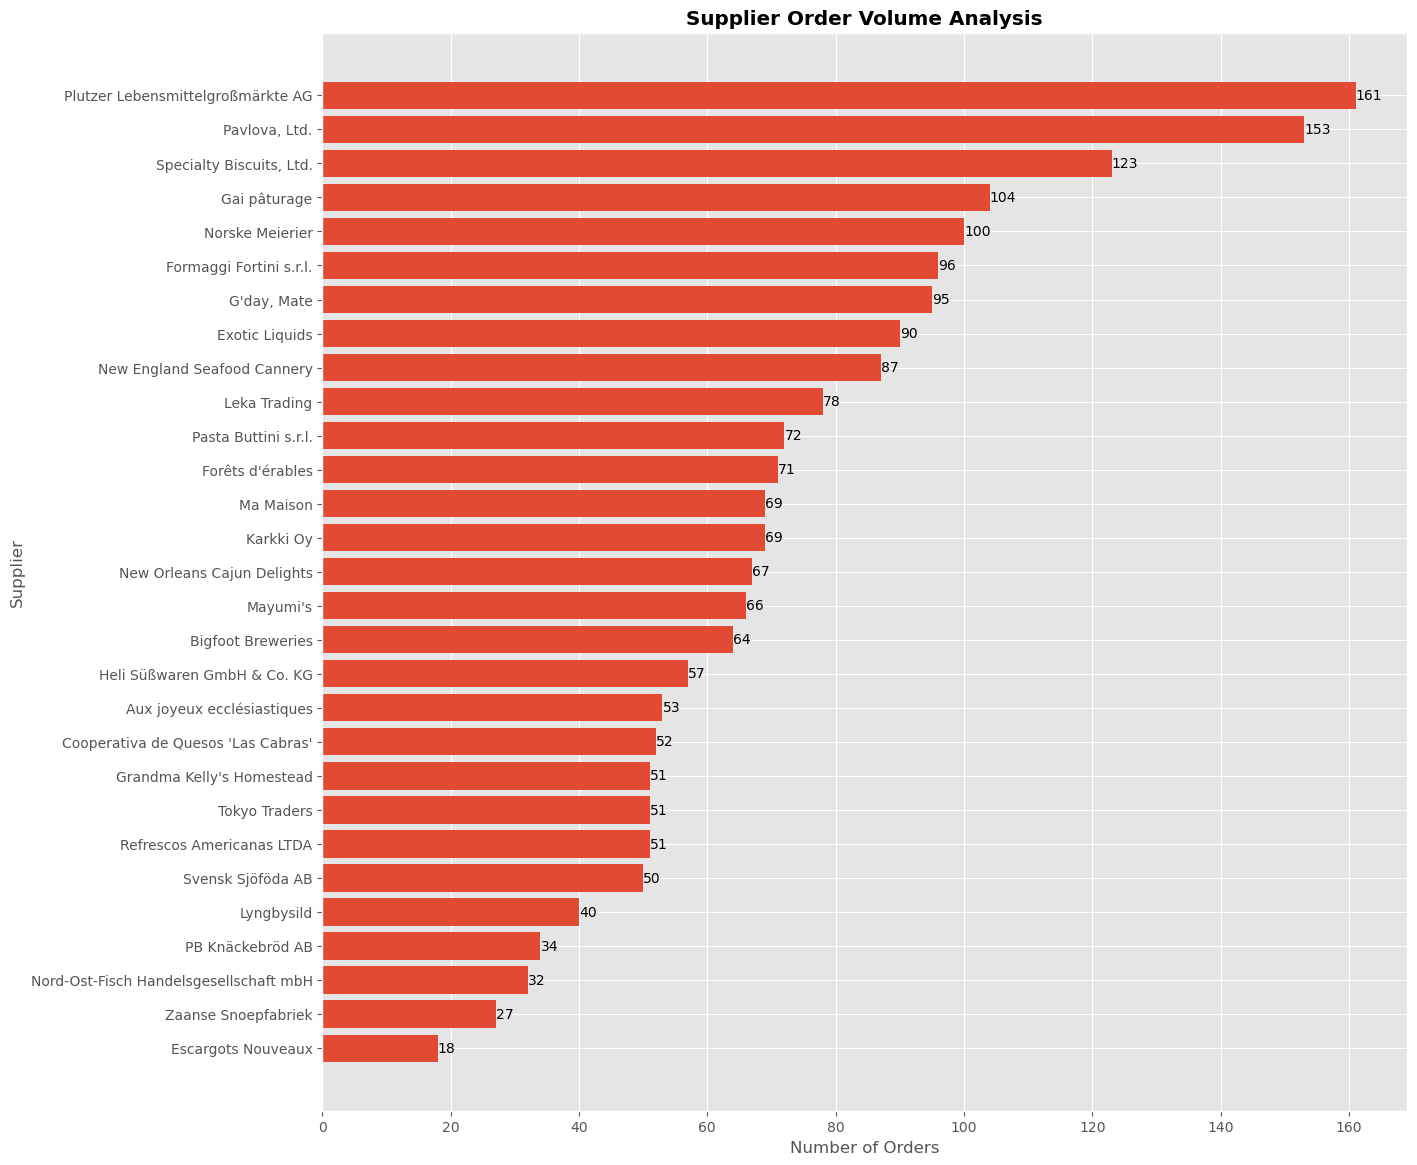

In [28]:
# Calculate unique order counts per supplier
supplier_orders = suppliers_analysis.groupby("SupplierName")["OrderID"].nunique().reset_index()
supplier_orders.sort_values("OrderID", inplace=True)

# Plot using object-oriented approach
fig, ax = plt.subplots(figsize=(14, 14))
bars = ax.barh(supplier_orders["SupplierName"], supplier_orders["OrderID"])

# Show values at the end of the bars
for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width()}', 
            va='center', ha='left', color='black')

# Make title bold
ax.set_title("Supplier Order Volume Analysis", fontweight='bold')
ax.set_xlabel("Number of Orders")
ax.set_ylabel("Supplier")
plt.show()

---

### **Supplier Performance Analysis**
**Objectives:**
- Evaluate the performance of suppliers based on the total revenue & total quantity sold generated from their products.
- Identify top-performing suppliers and those that may need improvement.

**Business Use-case:**
- This analysis helps in making informed decisions about supplier relationships, such as negotiating better terms, increasing orders from high-performing suppliers, or reconsidering partnerships with underperforming ones.

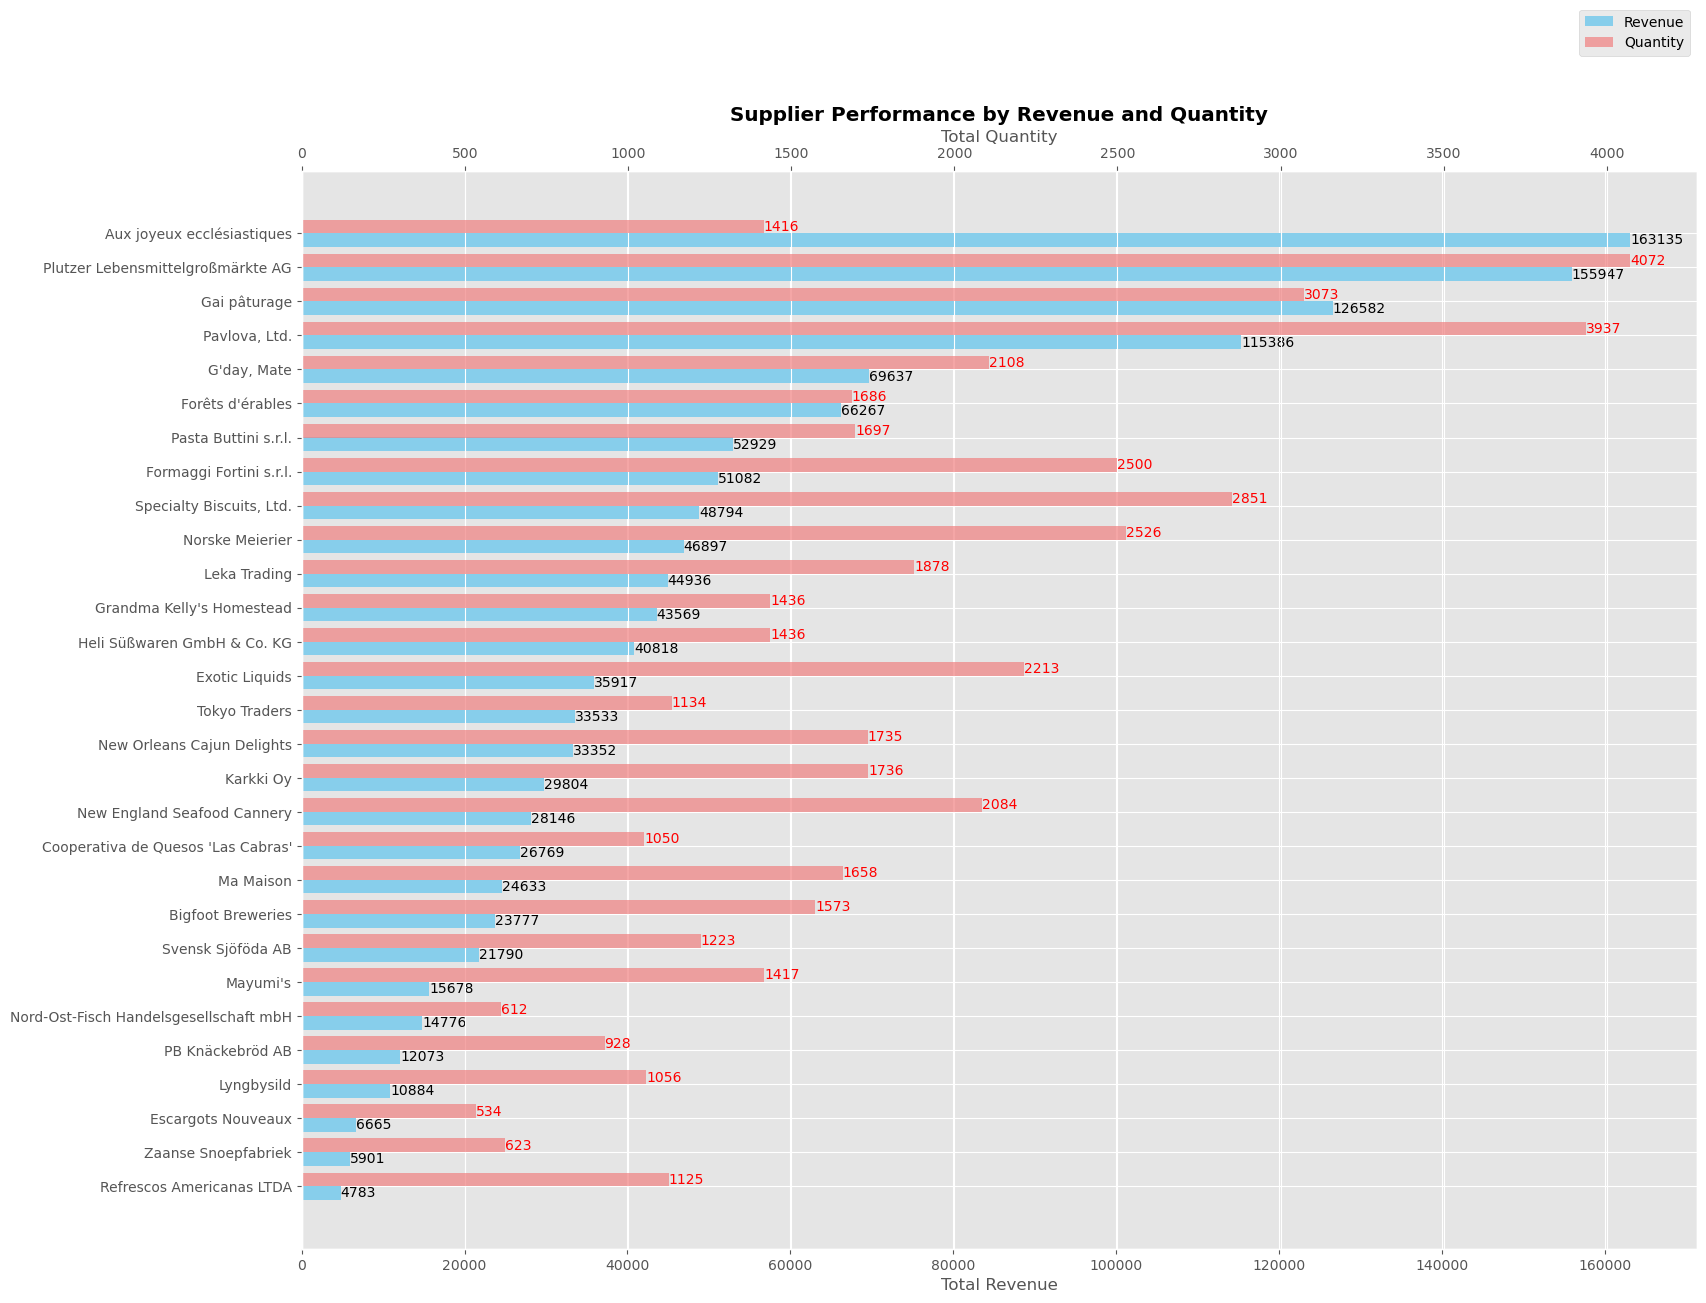

In [25]:
import numpy
# Group by SupplierName and calculate total revenue and total quantity
supplier_data = suppliers_analysis.groupby('SupplierName')[["Revenue", "Quantity"]].sum().reset_index().sort_values(by="Revenue", ascending=True)

# Plot supplier performance
fig, ax = plt.subplots(figsize=(18, 14))

# Set the bar width
bar_width = 0.4

# Set the y positions
y_pos = numpy.arange(len(supplier_data['SupplierName']))

# Plotting the revenue
bars1 = ax.barh(y_pos - bar_width/2, supplier_data['Revenue'], bar_width, color='skyblue', label='Revenue')

# Creating secondary axis for quantity at the bottom
ax2 = ax.twiny()
bars2 = ax2.barh(y_pos + bar_width/2, supplier_data['Quantity'], bar_width, color='lightcoral', alpha=0.7, label='Quantity')

# Set the labels and title
ax.set_yticks(y_pos)
ax.set_yticklabels(supplier_data['SupplierName'])
ax.set_xlabel('Total Revenue')
ax2.set_xlabel('Total Quantity')
ax.set_title('Supplier Performance by Revenue and Quantity', fontweight='bold')

# Add revenue values at the end of the bars, rounded to 0 decimal places
for bar in bars1:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, f'{width:.0f}', va='center', ha='left')

# Add quantity values at the end of the bars, rounded to 0 decimal places
for bar in bars2:
    width = bar.get_width()
    ax2.text(width, bar.get_y() + bar.get_height()/2, f'{width:.0f}', va='center', ha='left', color='red')

# Add legends
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 1.0))

plt.show()

---

### **Supplier Dependency Analysis**

**Objectives**
- Assess the number of products provided by each supplier.
- Determine the level of dependency on individual suppliers for the product portfolio.

**Business Use-case**

Understanding supplier dependency is critical for risk management. A high concentration of products from a few suppliers may expose the business to supply disruptions, prompting a need to diversify supplier relationships.


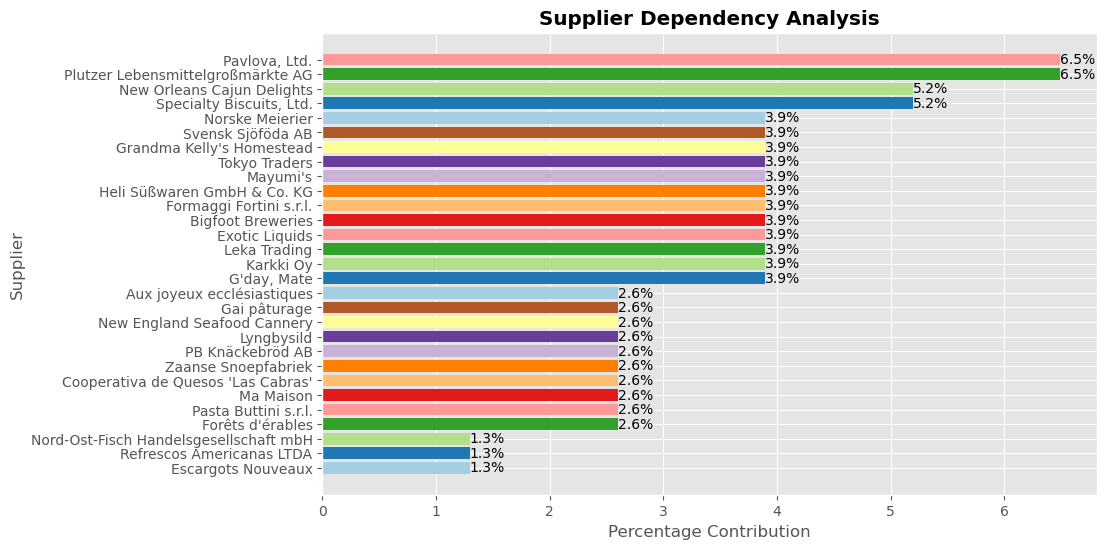

In [39]:
# Count the number of products per supplier from the products DataFrame
supplier_products = products.groupby("SupplierID")["ProductID"].count().reset_index()
supplier_products.rename(columns={"ProductID": "ProductCount"}, inplace=True)

# Merge with suppliers DataFrame to include supplier names
supplier_products = supplier_products.merge(suppliers[["SupplierID", "SupplierName"]], on="SupplierID", how="left")

# Calculate the percentage contribution of each supplier in the overall product portfolio
supplier_products["Percentage"] = (supplier_products["ProductCount"] / supplier_products["ProductCount"].sum()) * 100

supplier_products.sort_values("Percentage", inplace=True)   

# Plot using object-oriented approach (Horizontal bar chart)
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(supplier_products["SupplierName"], supplier_products["Percentage"], color=plt.cm.Paired.colors)

# Show values at the end of the bars
for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.1f}%', 
            va='center', ha='left', color='black')

# Make title bold
ax.set_title("Supplier Dependency Analysis", fontweight='bold')
ax.set_xlabel("Percentage Contribution")
ax.set_ylabel("Supplier")
plt.show()

---

### **Shipping Time Analysis**
**Objectives**

- Analyze the average shipping time for each supplier.

- Identify suppliers with the fastest and slowest shipping times.

**Business Use-case**

This analysis helps in improving customer satisfaction by identifying suppliers with slow shipping times and working with them to improve delivery performance.

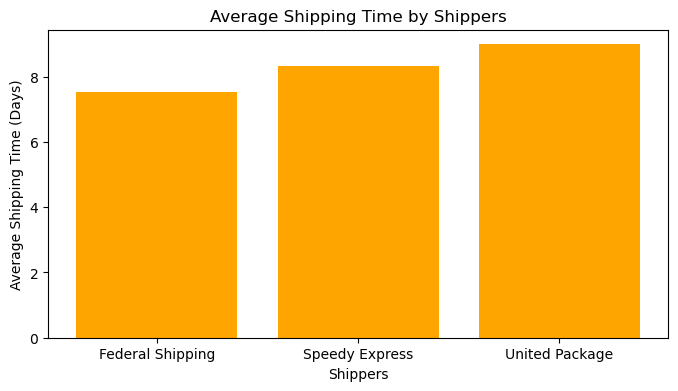

In [13]:
# Calculate average shipping time per supplier
supplier_shipping_time = suppliers_analysis.groupby('ShipperName')['ShippingTime'].mean().reset_index()

# Plot average shipping time
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(supplier_shipping_time['ShipperName'], supplier_shipping_time['ShippingTime'], color='orange')
ax.set_title('Average Shipping Time by Shippers')
ax.set_xlabel('Shippers')
ax.set_ylabel('Average Shipping Time (Days)')
ax.set_xticks(range(len(supplier_shipping_time['ShipperName'])))
ax.set_xticklabels(supplier_shipping_time['ShipperName'])
plt.show()

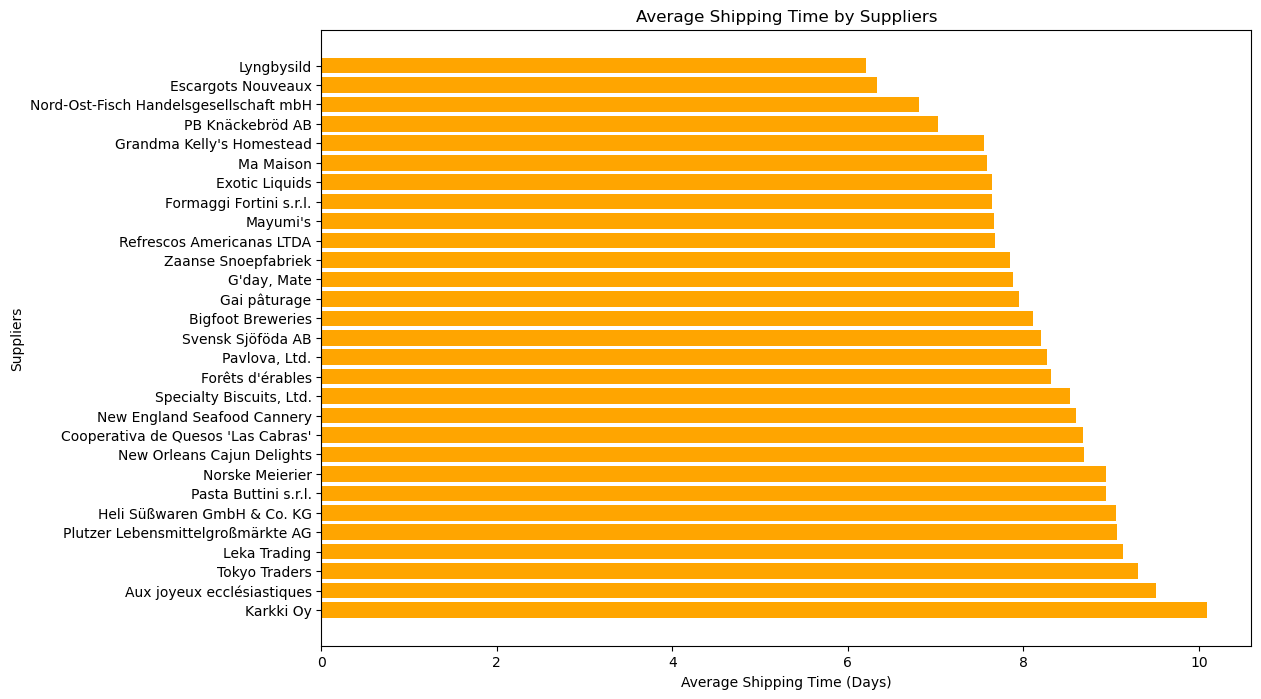

In [14]:
# Calculate average shipping time per supplier
supplier_shipping_time = suppliers_analysis.groupby('SupplierName')['ShippingTime'].mean().reset_index().sort_values(by="ShippingTime", ascending=False)

# Plot average shipping time
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(supplier_shipping_time['SupplierName'], supplier_shipping_time['ShippingTime'], color='orange')
ax.set_title('Average Shipping Time by Suppliers')
ax.set_xlabel('Average Shipping Time (Days)')
ax.set_ylabel('Suppliers')
plt.show()

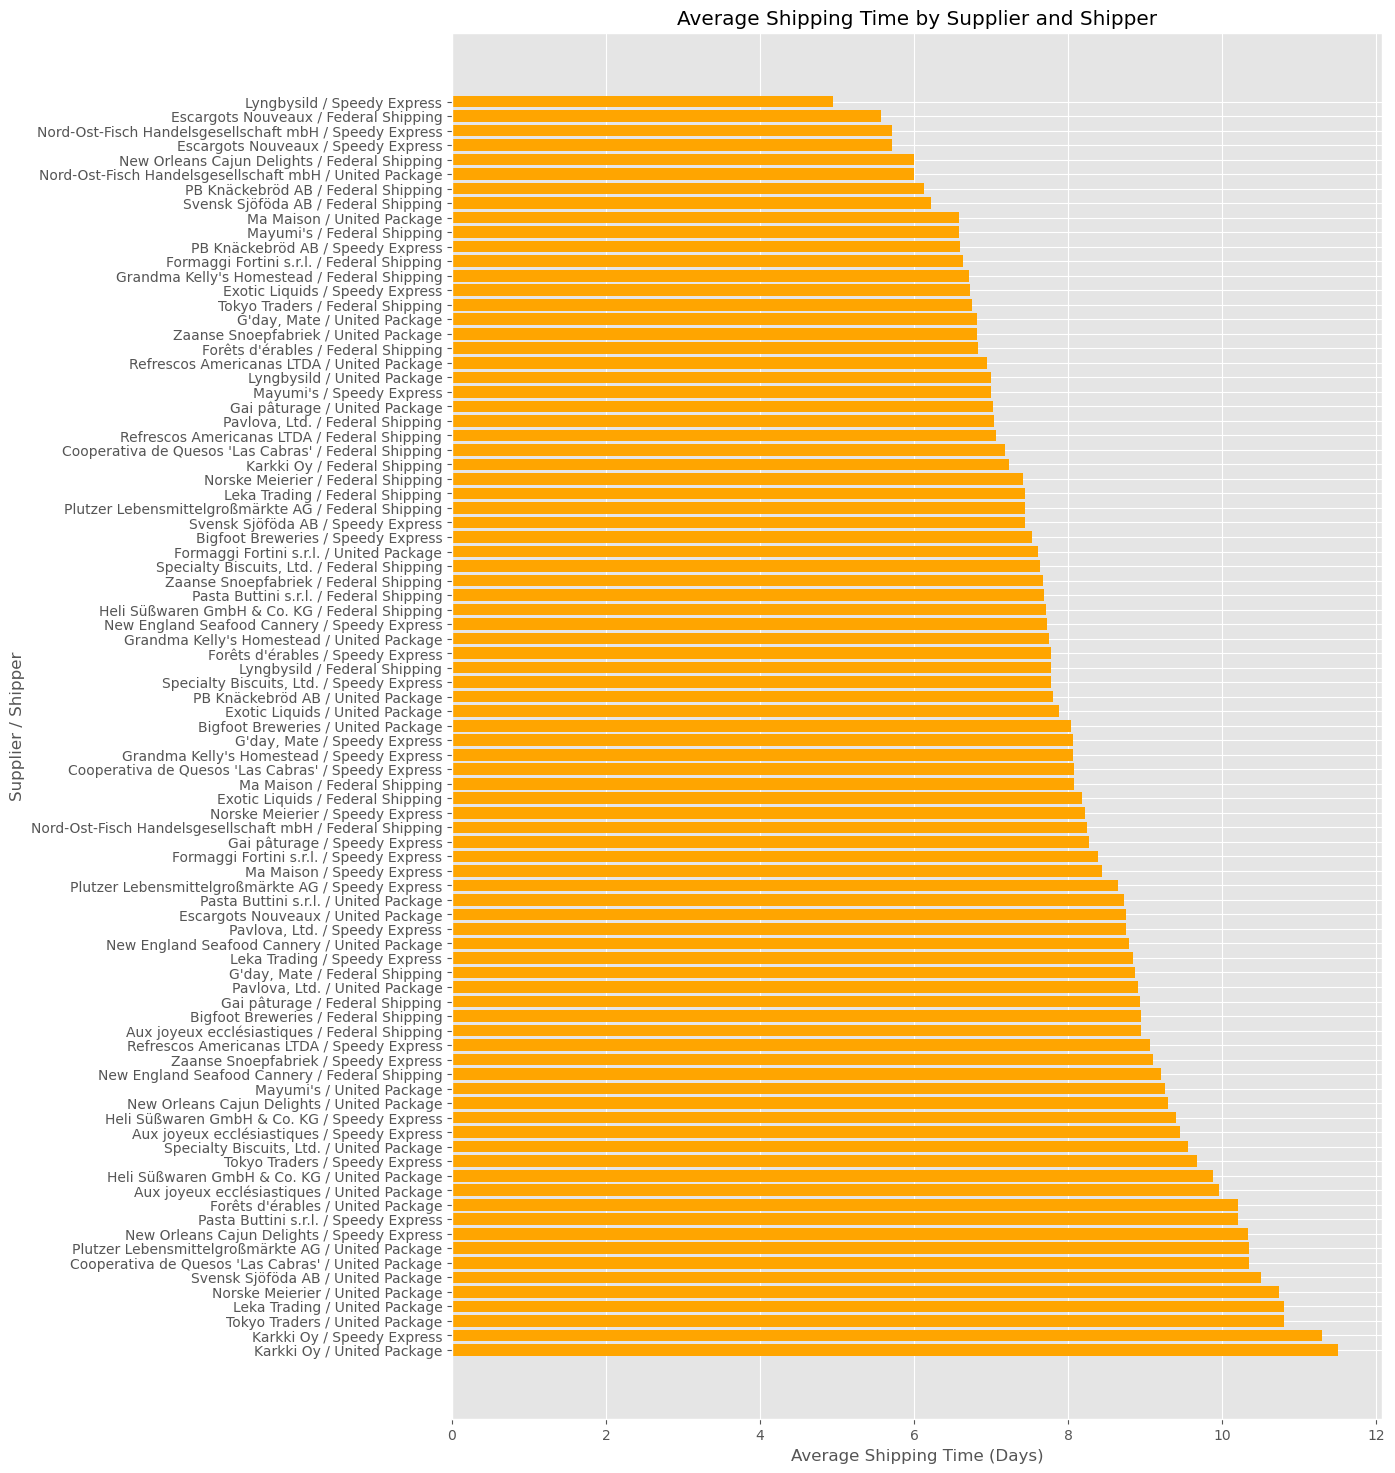

In [38]:
# Calculate average shipping time per supplier and shipper
supplier_shipper_shipping_time = suppliers_analysis.groupby(['SupplierName', 'ShipperName'])['ShippingTime'].mean().reset_index().sort_values(by="ShippingTime", ascending=False)

# Plot average shipping time
fig, ax = plt.subplots(figsize=(12, 18))
ax.barh(supplier_shipper_shipping_time['SupplierName'] + ' / ' + supplier_shipper_shipping_time['ShipperName'], 
        supplier_shipper_shipping_time['ShippingTime'], color='orange')
ax.set_title('Average Shipping Time by Supplier and Shipper')
ax.set_xlabel('Average Shipping Time (Days)')
ax.set_ylabel('Supplier / Shipper')
plt.show()

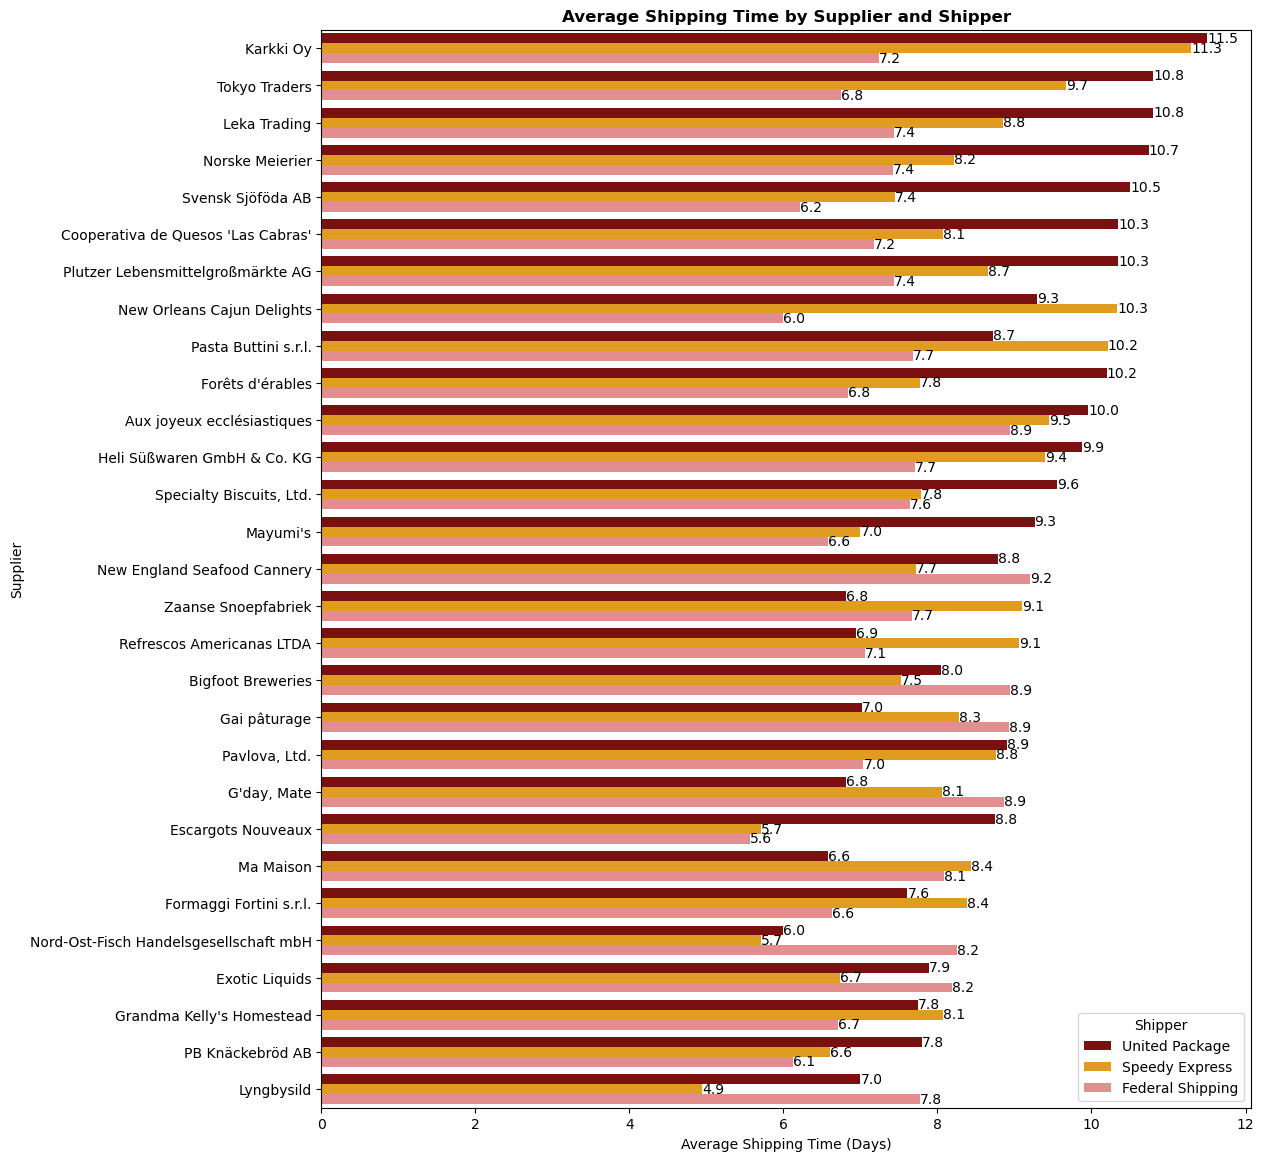

In [84]:
# Calculate average shipping time per supplier and shipper
supplier_shipper_shipping_time = suppliers_analysis.groupby(['SupplierName', 'ShipperName'])['ShippingTime'].mean().reset_index().sort_values(by="ShippingTime", ascending=False)

# Generate a custom continuous color palette
num_colors = supplier_shipper_shipping_time['ShipperName'].nunique()
custom_palette = sns.color_palette(sns.blend_palette(['darkred', 'orange', 'lightcoral'], num_colors))

# Plot average shipping time using seaborn
plt.figure(figsize=(12, 14))
ax = sns.barplot(x='ShippingTime', y='SupplierName', hue='ShipperName', data=supplier_shipper_shipping_time, palette=custom_palette)
plt.title('Average Shipping Time by Supplier and Shipper', weight='bold')
plt.xlabel('Average Shipping Time (Days)')
plt.ylabel('Supplier')
plt.legend(title='Shipper')

# Annotate the bars with the shipping time values
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge')

plt.show()

## Analysis Task 1: Supplier Distribution

**Objectives:** 
- Analyze the distribution of suppliers across different regions and countries.

**Business Use-case:** 
- Understand which regions or countries have the highest concentration of suppliers, helping in strategic decisions regarding logistics and supply chain management.

## Python Code:
import pandas as pd
import matplotlib.pyplot as plt

# Sample suppliers data
suppliers = pd.DataFrame({
    'SupplierID': [1, 2, 3],
    'CompanyName': ['Exotic Liquids', 'New Orleans Cajun Delights', 'Grandma Kelly\'s Homestead'],
    'City': ['London', 'New Orleans', 'Ann Arbor'],
    'Country': ['UK', 'USA', 'USA']
})

# Analyze supplier distribution by country
supplier_distribution = suppliers['Country'].value_counts()

# Plot supplier distribution
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(supplier_distribution.index, supplier_distribution.values, color='skyblue')
ax.set_title('Supplier Distribution by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Suppliers')
plt.show()


## Analysis Task 2: Supplier Product Analysis

**Objectives:** 
- Identify which products are provided by each supplier.

**Business Use-case:** 
- Helps in understanding the product portfolio of each supplier for better inventory and supply chain management.

## Python Code:
import pandas as pd

# Sample products data
products = pd.DataFrame({
    'ProductID': [1, 2, 3],
    'ProductName': ['Chai', 'Chang', 'Aniseed Syrup'],
    'SupplierID': [1, 1, 1],
    'CategoryID': [1, 1, 2]
})

# Sample suppliers data
suppliers = pd.DataFrame({
    'SupplierID': [1, 2, 3],
    'CompanyName': ['Exotic Liquids', 'New Orleans Cajun Delights', 'Grandma Kelly\'s Homestead']
})

# Merge products with suppliers
supplier_products = pd.merge(products, suppliers, on='SupplierID', how='left')

# Display the products provided by each supplier
supplier_products = supplier_products[['CompanyName', 'ProductName']].groupby('CompanyName').apply(lambda x: ', '.join(x['ProductName'])).reset_index()
supplier_products.columns = ['Supplier', 'Products']

supplier_products


## Analysis Task 3: Inventory Levels by Supplier

**Objectives:** 
- Compare the inventory levels of products provided by different suppliers.

**Business Use-case:** 
- Identifies potential supply chain risks and opportunities for restocking.

## Python Code:
import pandas as pd
import matplotlib.pyplot as plt

# Sample products data
products = pd.DataFrame({
    'ProductID': [1, 2, 3],
    'ProductName': ['Chai', 'Chang', 'Aniseed Syrup'],
    'SupplierID': [1, 1, 1],
    'UnitsInStock': [39, 17, 13],
    'UnitsOnOrder': [0, 40, 70]
})

# Sample suppliers data
suppliers = pd.DataFrame({
    'SupplierID': [1, 2, 3],
    'CompanyName': ['Exotic Liquids', 'New Orleans Cajun Delights', 'Grandma Kelly\'s Homestead']
})

# Merge products with suppliers
inventory_data = pd.merge(products, suppliers, on='SupplierID', how='left')

# Calculate total stock
inventory_data['TotalStock'] = inventory_data['UnitsInStock'] + inventory_data['UnitsOnOrder']

# Plot inventory levels by supplier
fig, ax = plt.subplots(figsize=(10, 6))
for supplier in inventory_data['CompanyName'].unique():
    supplier_data = inventory_data[inventory_data['CompanyName'] == supplier]
    ax.bar(supplier_data['ProductName'], supplier_data['TotalStock'], label=supplier)

ax.set_title('Inventory Levels by Supplier')
ax.set_xlabel('Product')
ax.set_ylabel('Total Units')
ax.legend()
plt.show()


## Analysis Task 4: Average Product Price per Supplier

**Objectives:** 
- Calculate the average product price for each supplier.

**Business Use-case:** 
- Helps in evaluating the cost-effectiveness of products supplied by different suppliers.

## Python Code:
import pandas as pd

# Sample products data
products = pd.DataFrame({
    'ProductID': [1, 2, 3],
    'ProductName': ['Chai', 'Chang', 'Aniseed Syrup'],
    'SupplierID': [1, 1, 1],
    'UndiscountedUnitPrice': [18.00, 19.00, 10.00]
})

# Sample suppliers data
suppliers = pd.DataFrame({
    'SupplierID': [1, 2, 3],
    'CompanyName': ['Exotic Liquids', 'New Orleans Cajun Delights', 'Grandma Kelly\'s Homestead']
})

# Merge products with suppliers
price_data = pd.merge(products, suppliers, on='SupplierID', how='left')

# Calculate average product price per supplier
average_price_per_supplier = price_data.groupby('CompanyName')['UndiscountedUnitPrice'].mean().reset_index()
average_price_per_supplier.columns = ['Supplier', 'AveragePrice']

average_price_per_supplier
